In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [113]:
df = pd.read_csv(
    "C:\\Users\\Chris\\Documents\\Python Scripts\\Thinkful File Examples\\NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013 - 13tbl8ny.csv",
    header=4
)

In [114]:
#data cleansing
df = df.drop([348, 349, 350])
clist = df.columns

for x in clist:
    try:
        df[x] = df[x].str.replace(',', '')
        df[x] = pd.to_numeric(df[x])
    except:
        pass 
df = df.fillna(0)

In [115]:
# Creating some binary data - Murder & Robbery_x
df['Murder'] = (df['Murder and\nnonnegligent\nmanslaughter'] == 0)
df['Robbery_x'] = (df['Robbery'] == 0)
df['Murder'] = pd.get_dummies(df['Murder'])
df['Robbery_x'] = pd.get_dummies(df['Robbery_x'])
df = df.drop(columns='City')

In [124]:
df.head()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder,Robbery_x
0,1861,0,0.0,0.0,0,0,0,12,2,10,0,0.0,0,0
1,2577,3,0.0,0.0,0,0,3,24,3,20,1,0.0,0,0
2,2846,3,0.0,0.0,0,0,3,16,1,15,0,0.0,0,0
3,97956,791,8.0,0.0,30,227,526,4090,705,3243,142,0.0,1,1
4,6388,23,0.0,0.0,3,4,16,223,53,165,5,0.0,0,1


In [125]:
# df = preprocessing.scale(df)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

# Trainng Data
Y_train = df_train['Murder']
X_train = df_train.loc[:, ~(df_train.columns).isin(['Murder'])]
X_train = preprocessing.scale(X_train)

# Test Data
Y_test = df_test['Murder']
X_test = df_test.loc[:, ~(df_test.columns).isin(['Murder'])]
X_test = preprocessing.scale(X_test)

In [141]:
# Vanilla Logistic Linear Model
regr = linear_model.LogisticRegression()
regr.fit(X_train, Y_train)
print(regr.score(X_train, Y_train))
print(regr.score(X_test, Y_test))

0.9195402298850575
0.8448275862068966


In [153]:
# Ridge Linear Model
ridgeregr = linear_model.LogisticRegression(penalty='l2', C=10)
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
print(ridgeregr.score(X_test, Y_test))

0.9942528735632183
0.8735632183908046


In [156]:
# Lasso Linear Model
lassoregr = linear_model.LogisticRegression(penalty='l1', C=0.5)
lassoregr.fit(X_train, Y_train)
print(lassoregr.score(X_train, Y_train))
print(lassoregr.score(X_test, Y_test))

0.9942528735632183
0.867816091954023


In [182]:
train_results = []
test_results = []
c_results = []

for x in range (1, 100):
    lassoregr = linear_model.LogisticRegression(penalty='l2', C=x*10)
    lassoregr.fit(X_train, Y_train)
    c_results = np.append(c_results, x*10)
    train_results = np.append(train_results, lassoregr.score(X_train, Y_train))
    test_results = np.append(test_results, lassoregr.score(X_test, Y_test))
    

In [147]:
A = .000000001
c = 1 / A
print(c)

999999999.9999999


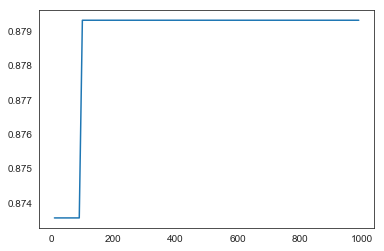

In [183]:
plt.plot(c_results, test_results)
# plt.ylim(0.87, 0.88)
# plt.xlim(0, 10)
plt.show()

In [ ]:
# This data already fit well with the vanilla linear regression and did not need help from Ridge or Lasso
# even when testing various C values.

